In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

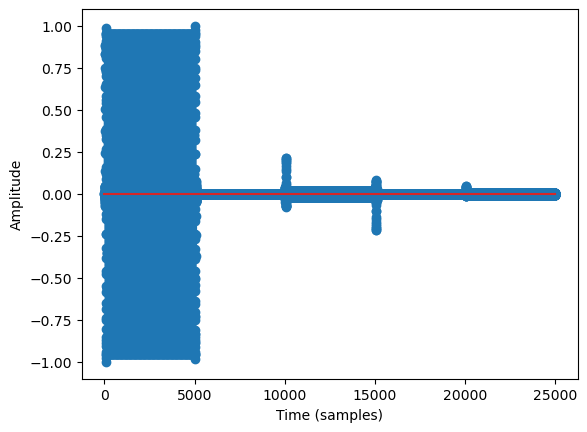

0.0002


In [36]:
# Read and plot in time domain the sound file bipsOUT.wav

bipsOUT, fs = librosa.load('bipsOUT.wav', sr=None)
period = 1/fs

plt.stem(bipsOUT)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

print(period)

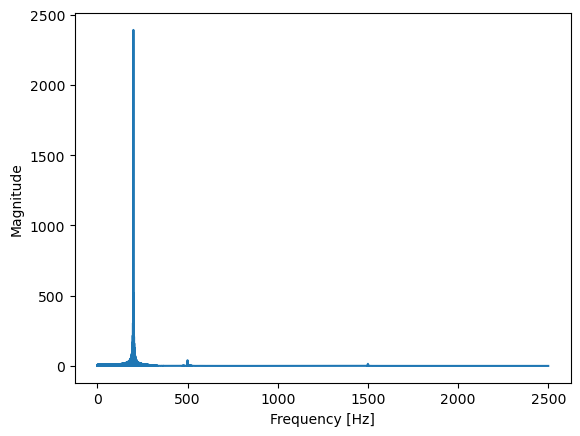

In [3]:
# Using the fourrier transform, plot the magnitude of the frequency spectrum of the sound file bipsOUT.wav

fft_bipsOUT = np.fft.fft(bipsOUT)
frequency = np.fft.fftfreq(len(fft_bipsOUT), 1/fs)
frequency = frequency[:len(frequency)//2]
fft_bipsOUT = fft_bipsOUT[:len(fft_bipsOUT)//2]
plt.plot(frequency, np.abs(fft_bipsOUT))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

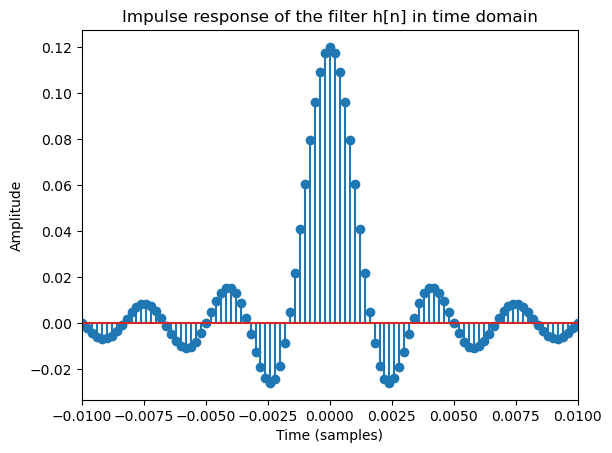

In [64]:
# Lendo o arquivo de audio bipsIN.wav
bipsIN, fs_bipsin = librosa.load('bipsIN.wav', sr=None)
period_bipsin = 1/fs_bipsin
duracao = (len(bipsIN))/fs_bipsin


n = np.arange(-duracao/2, duracao/2, period_bipsin)
fc = 300 # Frequência de corte do filtro

# Fazendo um sinal no dominio do tempo h[n] que seja uma sinc com frequência igual a 300Hz
h = np.sinc(fc * n * 2)
h = h / np.sum(h)

# Plotando o sinal resultante da convolução
plt.stem(n, h)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Impulse response of the filter h[n] in time domain')
plt.xlim(-0.01, 0.01)
plt.show()

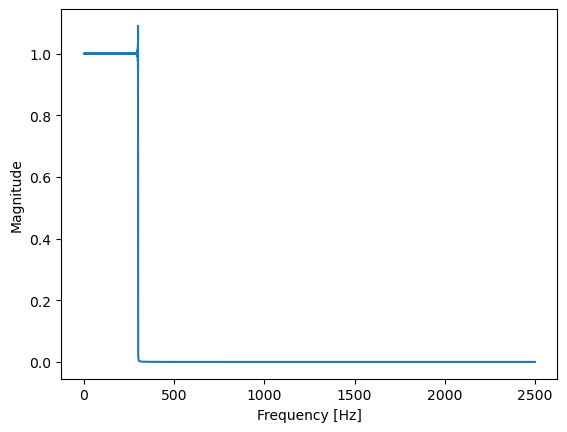

In [71]:
# Mostrando a resposta ao impulso do filtro h no dominio da frequência
fft_h = np.fft.fft(h)
freq_h = np.fft.fftfreq(len(fft_h), 1/fs_bipsin)
freq_h = freq_h[:len(freq_h)//2]
fft_h = fft_h[:len(fft_h)//2]

plt.plot(freq_h, np.abs(fft_h))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

Fazendo agora a plotagem do sinal após o filtro

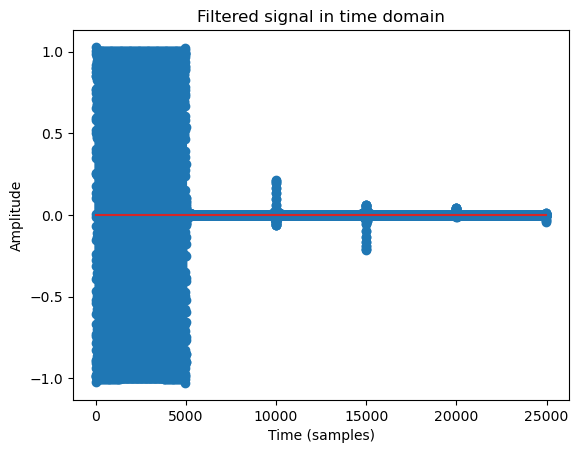

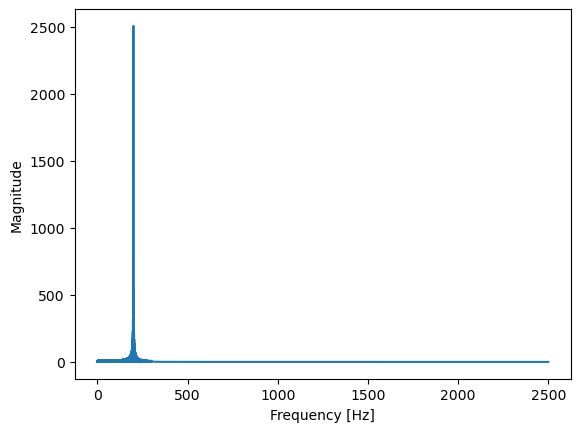

In [70]:
# Fazendo a convolução entre os sinais bipsIN e h
bipsIN_filtered = np.convolve(bipsIN, h, mode='same')

# Plotando o sinal resultante da convolução
plt.stem(bipsIN_filtered)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Filtered signal in time domain')
plt.show()

# Plotando o sinal resultante da convolução no dominio da frequência
fft_bipsIN_filtered = np.fft.fft(bipsIN_filtered)
freq_bipsIN_filtered = np.fft.fftfreq(len(fft_bipsIN_filtered), 1/fs_bipsin)
freq_bipsIN_filtered = freq_bipsIN_filtered[:len(freq_bipsIN_filtered)//2]
fft_bipsIN_filtered = fft_bipsIN_filtered[:len(fft_bipsIN_filtered)//2]

plt.plot(freq_bipsIN_filtered, np.abs(fft_bipsIN_filtered))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()
